# Image BackProjection: OpenCV

Image backprojection is a technique used in computer vision and image processing to highlight regions in an image that match a given histogram or color distribution. It's often used for tasks like object tracking, image segmentation, and finding regions of interest that have similar color or texture characteristics.

In OpenCV, you can perform image backprojection using the `cv2.calcBackProject()` function. To use image backprojection effectively, you typically follow these steps:

1. **Histogram Calculation**: Calculate a histogram of the reference image or a region of interest (ROI) in the image. This histogram represents the color or intensity distribution you want to find in the target image.

2. **Backprojection**: Apply the backprojection operation to the entire image or a specific region. The backprojection highlights areas in the image that have a similar color or intensity distribution to the reference histogram.

3. **Thresholding**: You can optionally apply thresholding to the backprojection result to obtain a binary mask that separates the regions of interest from the rest of the image.

Here's a simplified example of how to perform image backprojection in OpenCV using Python:

```python
import cv2
import numpy as np

# Read the target image
target_image = cv2.imread('target.jpg')

# Convert the target image to the HSV color space
hsv_target = cv2.cvtColor(target_image, cv2.COLOR_BGR2HSV)

# Read the reference image (the image to search for)
reference_image = cv2.imread('reference.jpg')

# Convert the reference image to the HSV color space
hsv_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2HSV)

# Calculate the histogram of the reference image's hue channel
hist = cv2.calcHist([hsv_reference], [0], None, [256], [0, 256])

# Normalize the histogram
cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

# Perform backprojection
backprojection = cv2.calcBackProject([hsv_target], [0], hist, [0, 256], scale=1)

# Threshold the backprojection result (optional)
_, binary_mask = cv2.threshold(backprojection, 50, 255, cv2.THRESH_BINARY)

# Display the backprojection result and binary mask
cv2.imshow('Backprojection Result', backprojection)
cv2.imshow('Binary Mask', binary_mask)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In this example, we read a target image and a reference image, convert them to the HSV color space, and calculate the histogram of the reference image's hue channel. We then perform backprojection using `cv2.calcBackProject()`. Optionally, we threshold the backprojection result to create a binary mask that highlights regions in the target image that match the reference histogram.

Keep in mind that the effectiveness of image backprojection depends on factors like the quality of the reference histogram, the color space used, and the choice of parameters (such as the threshold value). Adjusting these parameters may be necessary to achieve optimal results for your specific application.

In [4]:
import cv2
import numpy as np

# Read the target image
target_image = cv2.imread('Images/green.jpg')
#target_image = cv2.resize(target_image, (500, 500))

# Convert the target image to the HSV color space
hsv_target = cv2.cvtColor(target_image, cv2.COLOR_BGR2HSV)

# Read the reference image (the image to search for)
reference_image = cv2.imread('Images/pexels-pixabay-33045.jpg')

# Convert the reference image to the HSV color space
hsv_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2HSV)

# Calculate the histogram of the reference image's hue channel
hist = cv2.calcHist([hsv_reference], [0], None, [256], [0, 256])

# Normalize the histogram
cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

# Perform backprojection
backprojection = cv2.calcBackProject([hsv_target], [0], hist, [0, 256], scale=1)

# Threshold the backprojection result (optional)
_, binary_mask = cv2.threshold(backprojection, 50, 255, cv2.THRESH_BINARY)

# Display the backprojection result and binary mask
cv2.imshow('Backprojection Result', backprojection)
cv2.imshow('Binary Mask', binary_mask)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
#BackProjection using histogram technique

import cv2
import numpy as np


original_image = cv2.imread("Images/green.jpg")
original_image = cv2.resize(original_image,(600,650))
hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

roi = cv2.imread("Images/g.jpg")
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)


# Histogram ROI
roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
mask = cv2.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)

# Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 200, 255, cv2.THRESH_BINARY)

mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_or(original_image, mask)

cv2.imshow("Mask", mask)
cv2.imshow("Original image", original_image)
cv2.imshow("Result", result)
cv2.imshow("Roi", hsv_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

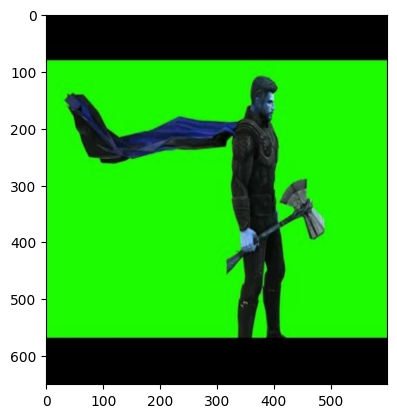

In [6]:
import matplotlib.pyplot as plt

plt.imshow(original_image)

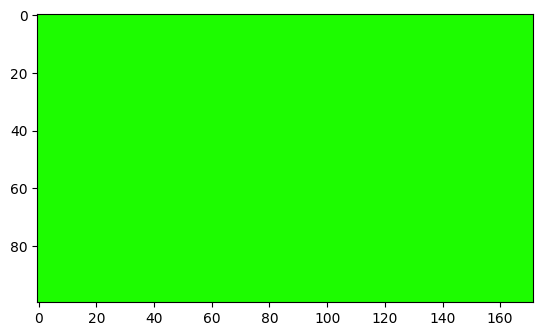

In [7]:
plt.imshow(roi)

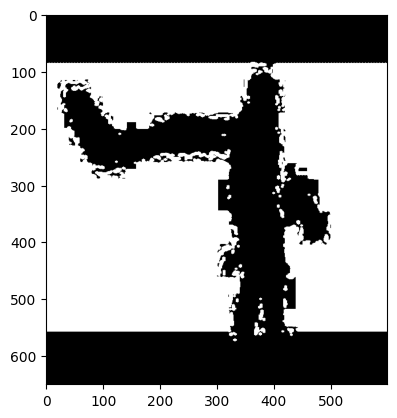

In [8]:
plt.imshow(mask)

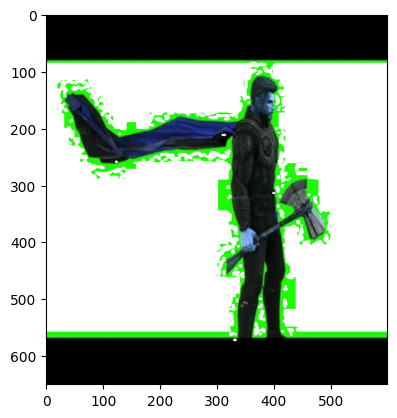

In [9]:
plt.imshow(result)